In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

plt.rcParams["font.family"] = "Times New Roman"

In [2]:
# N_steps = 10
N_steps_orig = 1600 
N_k = 256
T_h = 54 * 1600
N_x = 10
N_y = 10

In [3]:
# result_loc = "./../../../../Server_results/12_06_2021_mean_var/"
result_loc = "./../../../../Server_results/12_06_2021_mean_var/"


# result_loc = "./../results/"
# run_name = "experiment06_12_12_38_33"
# run_name = "experiment08_12_19_50_2"
# run_name = "experiment07_12_22_33_43"
# run_name = "experiment09_12_16_39_14"
run_name = "experiment24_02_22_27_28"



train_loc = "exitq_mean_50.txt"


In [4]:
p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,-1,N_k])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

k = np.loadtxt(f"{result_loc}{run_name}k.txt")
k = k.reshape([N_epoch,-1])

N_steps = q_x.shape[1]

t = np.linspace(0,T_h/3600,N_steps)
t_fine = np.linspace(0,T_h/3600,N_steps_orig)

In [5]:
N_steps

50

In [6]:
y_t = np.loadtxt(f"{train_loc}")

In [7]:
y_t.mean(axis=0)

array([1.21412240e-08, 1.17841556e-08, 1.16158671e-08, ...,
       9.97888774e-09, 9.97887562e-09, 9.97888744e-09])

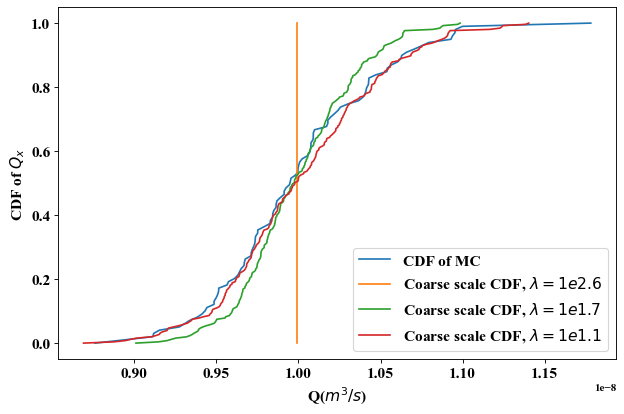

In [8]:
epoch_1 = 10
epoch_2 = 29
epoch_3 = 40

time_step = 30


my_dpi = 80
fig, axs = plt.subplots(1, 1, figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(111)
# ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = y_t[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC')


q_plot = q_x[epoch_1,time_step,:]
index_plot = np.argsort(q_plot)
plt.plot(q_plot[index_plot],np.linspace(0,1,N_k),label=rf'Coarse scale CDF, $\lambda = 1e{np.round(-lam[epoch_1],1)}$')

q_plot = q_x[epoch_2,time_step,:]
index_plot = np.argsort(q_plot)
plt.plot(q_plot[index_plot],np.linspace(0,1,N_k),label=rf'Coarse scale CDF, $\lambda = 1e{np.round(-lam[epoch_2],1)}$')

q_plot = q_x[epoch_3,time_step,:]
index_plot = np.argsort(q_plot)
plt.plot(q_plot[index_plot],np.linspace(0,1,N_k),label=rf'Coarse scale CDF, $\lambda = 1e{np.round(-lam[epoch_3],1)}$')


plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)




plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)

# plt.xlim(0.0, 5.0e-8)

# ax1 = plt.subplot(122)
# ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

# Q_MC = q_MC_y[:,ii]

# index_MC = np.argsort(Q_MC)
# plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={ii} days')
# plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
# plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

# plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
# plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

# plt.tick_params(axis='both', which='major', labelsize=14)
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# plt.legend(loc=4, fontsize= 14)
# plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

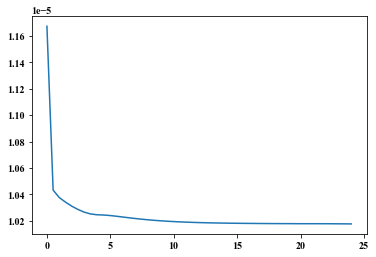

In [9]:
plt.plot(t,np.exp(k[80,::2]))

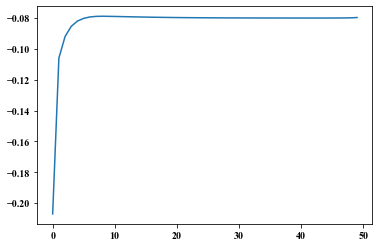

In [10]:
plt.plot(k[80,1::2])

Text(0.5, 0, '$ \\lambda$')

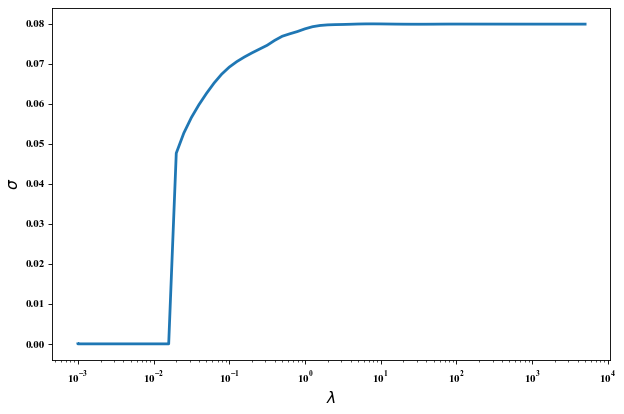

In [11]:
my_dpi = 80
fig, axs = plt.subplots(1, 1, figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(111)

plt.semilogx(10**lam[1::2],abs(k[1::2,51]), linewidth=2.5,)


plt.ylabel(r'$\sigma$', fontsize= 14)
plt.xlabel(r'$ \lambda$', fontsize= 14)

# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))



No handles with labels found to put in legend.


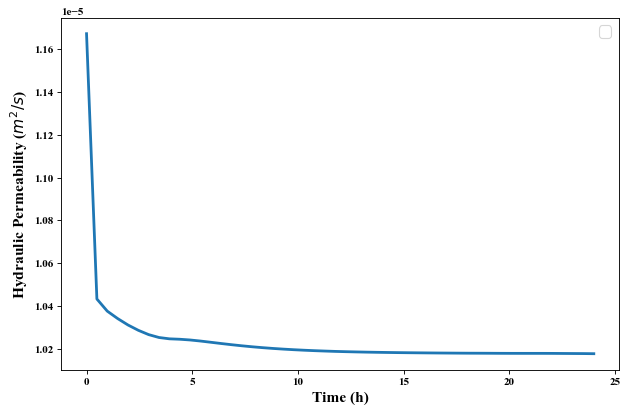

In [12]:
my_dpi = 80
fig, axs = plt.subplots(1, 1, figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(111)


plt.plot(t,np.exp(k[80,::2]), linewidth=2.5,)
# plt.plot(t,q_x[50,:,:].mean(axis=1),'b',label=r'mean upscaled')
# plt.plot(t,pd.DataFrame(q_x[50,:,:]).quantile([0.25],axis=1).iloc[0].values,'b--',label=r'$25^{th} / 75^{th}$ percentile upscaled')
# plt.plot(t,pd.DataFrame(q_x[50,:,:]).quantile([0.75],axis=1).iloc[0].values,'b--')



# plt.plot(t,y_t.mean(axis=0)[1::32],'r',label=r'mean MC')
# plt.plot(t,pd.DataFrame(y_t).quantile([0.25],axis=0).iloc[0].values[1::32],'r--',label=r'$25^{th} / 75^{th}$ percentile MC')
# plt.plot(t,pd.DataFrame(y_t).quantile([0.75],axis=0).iloc[0].values[1::32],'r--')




plt.ylabel(r'Hydraulic Permeability ($m^2/s$)', fontsize= 14)
plt.xlabel(r'Time (h)', fontsize= 14)

plt.legend(loc=1, fontsize= 14)


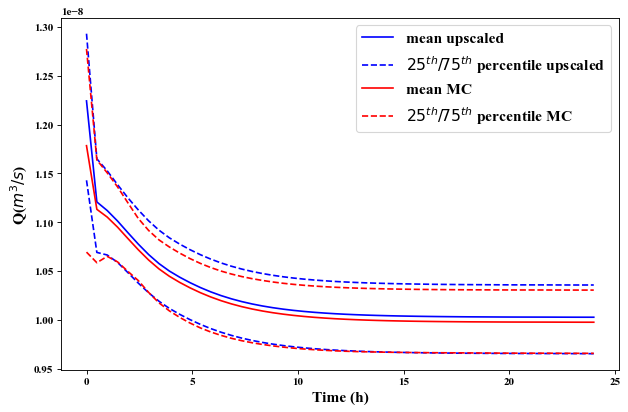

In [13]:
my_dpi = 80
fig, axs = plt.subplots(1, 1, figsize=(600/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(111)

plt.plot(t,q_x[50,:,:].mean(axis=1),'b',label=r'mean upscaled')
plt.plot(t,pd.DataFrame(q_x[50,:,:]).quantile([0.25],axis=1).iloc[0].values,'b--',label=r'$25^{th} / 75^{th}$ percentile upscaled')
plt.plot(t,pd.DataFrame(q_x[50,:,:]).quantile([0.75],axis=1).iloc[0].values,'b--')

plt.plot(t,y_t.mean(axis=0)[1::32],'r',label=r'mean MC')
plt.plot(t,pd.DataFrame(y_t).quantile([0.25],axis=0).iloc[0].values[1::32],'r--',label=r'$25^{th} / 75^{th}$ percentile MC')
plt.plot(t,pd.DataFrame(y_t).quantile([0.75],axis=0).iloc[0].values[1::32],'r--')

plt.ylabel(r'Q($m^3/s$)', fontsize= 14)
plt.xlabel(r'Time (h)', fontsize= 14)

plt.legend(loc=1, fontsize= 14)


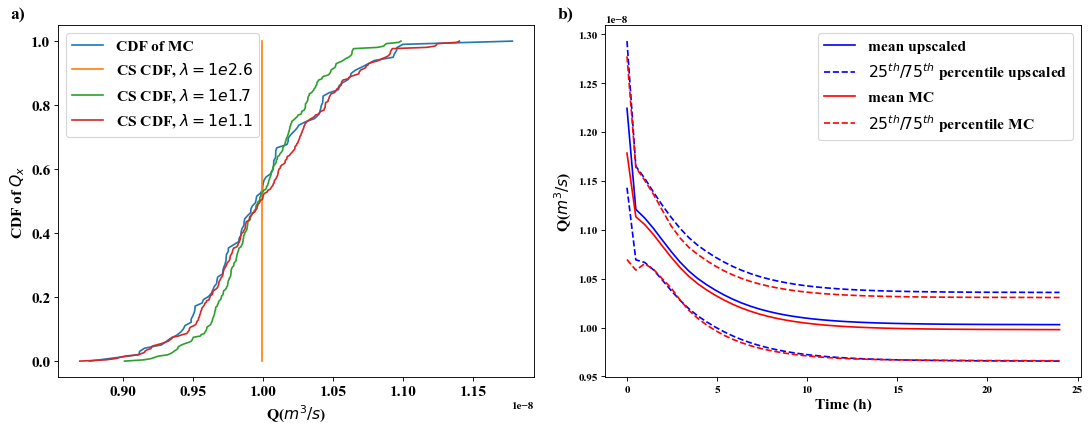

In [14]:
my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)


ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = y_t[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC')


q_plot = q_x[epoch_1,time_step,:]
index_plot = np.argsort(q_plot)
plt.plot(q_plot[index_plot],np.linspace(0,1,N_k),label=rf'CS CDF, $\lambda = 1e{np.round(-lam[epoch_1],1)}$')

q_plot = q_x[epoch_2,time_step,:]
index_plot = np.argsort(q_plot)
plt.plot(q_plot[index_plot],np.linspace(0,1,N_k),label=rf'CS CDF, $\lambda = 1e{np.round(-lam[epoch_2],1)}$')

q_plot = q_x[epoch_3,time_step,:]
index_plot = np.argsort(q_plot)
plt.plot(q_plot[index_plot],np.linspace(0,1,N_k),label=rf'CS CDF, $\lambda = 1e{np.round(-lam[epoch_3],1)}$')


plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)




plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=2, fontsize= 14)





ax2 = plt.subplot(122)
ax2.text(-0.1, 1.02, 'b)', transform=ax2.transAxes,size=16)


plt.plot(t,q_x[50,:,:].mean(axis=1),'b',label=r'mean upscaled')
plt.plot(t,pd.DataFrame(q_x[50,:,:]).quantile([0.25],axis=1).iloc[0].values,'b--',label=r'$25^{th} / 75^{th}$ percentile upscaled')
plt.plot(t,pd.DataFrame(q_x[50,:,:]).quantile([0.75],axis=1).iloc[0].values,'b--')

plt.plot(t,y_t.mean(axis=0)[1::32],'r',label=r'mean MC')
plt.plot(t,pd.DataFrame(y_t).quantile([0.25],axis=0).iloc[0].values[1::32],'r--',label=r'$25^{th} / 75^{th}$ percentile MC')
plt.plot(t,pd.DataFrame(y_t).quantile([0.75],axis=0).iloc[0].values[1::32],'r--')

plt.ylabel(r'Q($m^3/s$)', fontsize= 14)
plt.xlabel(r'Time (h)', fontsize= 14)

plt.legend(loc=1, fontsize= 14)

plt.savefig('dist_lamb_t.pdf', bbox_inches='tight',dpi=my_dpi)
plt.savefig('dist_lamb_t.png', bbox_inches='tight',dpi=my_dpi)

plt.show()


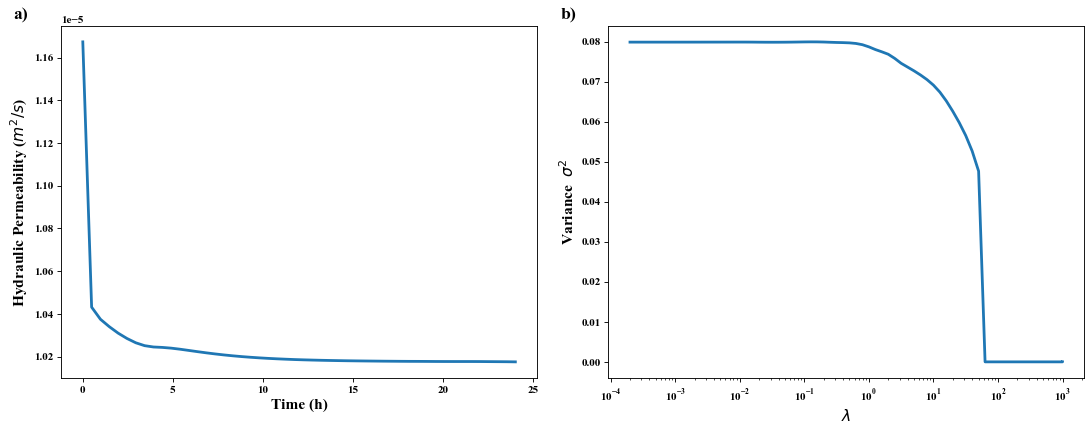

In [15]:
my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)


ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

plt.plot(t,np.exp(k[80,::2]), linewidth=2.5,)

plt.ylabel(r'Hydraulic Permeability ($m^2/s$)', fontsize= 14)
plt.xlabel(r'Time (h)', fontsize= 14)

# plt.legend(loc=1, fontsize= 14)

ax2 = plt.subplot(122)
ax2.text(-0.1, 1.02, 'b)', transform=ax2.transAxes,size=16)

plt.semilogx(10**(-lam[1::2]),abs(k[1::2,51]), linewidth=2.5,)


plt.ylabel(r'Variance  $\sigma^2$', fontsize= 14)
plt.xlabel(r'$ \lambda$', fontsize= 14)

plt.savefig('K_v_t_sigma_lam_paper.pdf', bbox_inches='tight',dpi=my_dpi)
plt.savefig('K_v_t_sigma_lam_paper.png', bbox_inches='tight',dpi=my_dpi)

plt.show()

